In [20]:
import pandas as pd   
import funcs
import re
from tqdm import tqdm
import seaborn as sns
from nltk.probability import FreqDist

In [10]:
#function for initial removing of most common in english words
def prepare(stringy):
    return re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', ' ', stringy.lower())

In [17]:
# pd.set_option('display.max_columns', None)  # or 1000
# pd.set_option('display.max_rows', None)  # or 1000
#pd.set_option('display.max_colwidth', 170)  # or 199
# pd.reset_option('display.max_columns')
# pd.reset_option('display.max_rows')
#pd.reset_option('display.max_colwidth')
pd.options.display.expand_frame_repr = False

In [12]:
#Load data from jsonl
jsonObj = pd.read_json(path_or_buf="data/ranking_train.jsonl", lines=True)
#initialization
zero_score = []
df = {"text":[], "comments":[], "lem_comments":[], "score":[]}
text_ar = []
comment_ar = []
score_ar = []
lem_text_ar = []
lem_com_ar = []

In [13]:
#Writing text, comments, scores into arrays and making them in lowercase, lemmatization
#len(jsonObj)
for i in tqdm(range(0,len(jsonObj))):
    for j in range(0, 5):
        text_ar.append(jsonObj['text'][i].lower())
        raw_text = prepare(jsonObj['text'][i])
        lem_text_ar.append(funcs.lemmatizer_func(raw_text)) 
        comment_ar.append(jsonObj["comments"][i][j]['text'].lower())
        raw_com = prepare(jsonObj["comments"][i][j]['text'])
        lem_com_ar.append(funcs.lemmatizer_func(raw_com))
        #lem_com_ar.append(funcs.text_preprocessing(raw_com))
        score_ar.append(jsonObj['comments'][i][j]['score'])

100%|██████████| 88107/88107 [36:59<00:00, 39.69it/s]   


In [18]:
#Creating dictionary of values for pandas df
data_dict = {"text":text_ar, "lem_text":lem_text_ar, "comment":comment_ar, "lem_comments":lem_com_ar, "score":score_ar}

#Creating pandas df
df = pd.DataFrame(data_dict)
df.fillna('')

print(df[['comment', 'lem_comments']])

                                                  comment                                       lem_comments
0       going back to school is not identical with giv...  go back school identical give up founder go ba...
1       there will invariably be those who don't see t...  invariably see success set for fall back origi...
2       for me school is a way to be connected to what...  school way connect go real world enter school ...
3       i guess it really depends on how hungry you ar...  guess really depend hungry much believe produc...
4       i know pollground decided to go back to school...  know pollground decide go back school get comb...
...                                                   ...                                                ...
440530  most major banks offer a service called &#x27;...  major bank offer service call bill pay free di...
440531  it costs 3.25%, or $74.25 for the example of $...  cost example you re look rack quot reward poin...
440532  as many oth

<Axes: >

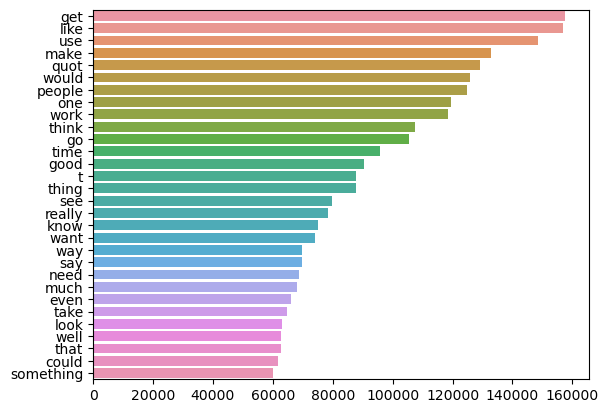

In [19]:
# сheck for most encounter words.
corpus = [word for i in df["lem_comments"].str.split().values.tolist() for word in i]
most_common = FreqDist(corpus).most_common(30)
words, frequency = [], []

for word, count in most_common:
    words.append(word)
    frequency.append(count)
    
sns.barplot(x = frequency, y = words)

In [ ]:
#save processed dataframe
df.to_csv('data/arr_data.csv')